In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Week 10: Lecture 18 Conclusion

## Do people with pets get more exercise?

### Preparing the Data

Let's load the class dataset again:

In [3]:
class_data_w23 = Table.read_table('./data/cmpsc5a-classdata-w23.csv')
class_data_w23

Area Code,Major,Height,Eating Out,Handedness,Siblings,Birth Order,Exercise,Pets,Hours of Media,Random,Award,Tattoo,Sleep,Color,Coffee or Bagel,Tie Dyed,Commute Time,Commute Mode,WPM,Insta Follows,Social Media Accounts,Platform,Hours of Chores,Cursive
661,Physics,66,0,Right-handed,0,1,10,1,20,2790,Nobel Prize,No,5,blue,Bagel,No,15,bus,80,125,7,twitter,3,No
760,Economics,71,1,Right-handed,3,4,5,1,4,8472,Olympic Medal,No,8,blue,Bagel,No,10,bike,60,1323,3,Twitter,1,Yes
951,pre psychological and brain sciences,69,1,Right-handed,3,2,12,5,5,1953,Academy Award,No,7,sky blue,Bagel,No,30,bus,28,nan,1,Twitter,3,Yes
805,economics,65,6,Right-handed,0,1,2,1,10,1115,Nobel Prize,No,8,light pink,Coffee,No,30,bus,70,26,10,wechat,2,No
805,Communications,66,5,Right-handed,0,1,2,2,4,1234,Academy Award,No,10,Pink,Bagel,No,15,bike,50,400,7,WeChat,3,No
202,linguistics; environmental studies,67,1,Both left- and right-handed,1,1,2,0,2,5037,Nobel Prize,No,8,blue,Bagel,No,15,bus,65,124,5,nan,nan,No
818,sociology,62,3,Right-handed,0,1,11,0,3,3804,Olympic Medal,No,10,purple,Bagel,Yes,15,bike,100,595,8,twitter,3,Yes
408,English,64,1,Right-handed,2,3,7,1,4,5647,Nobel Prize,No,7,Green,Coffee,Yes,10,bike,nan,nan,5,nan,nan,Yes
408,Psychology,70,4,Right-handed,1,1,5,1,20,4821,Nobel Prize,No,8,Black,Bagel,No,14,bus,135,650,4,TikTok,0,Yes
805,communication,63,5,Right-handed,1,2,2,0,5,3419,Nobel Prize,No,7,purple,Coffee,No,15,bus,100,200,5,ins,1,Yes


There's a lot of data here that isn't relevant to our research question, so we can clean this up somewhat by selecting only the columns indicating number of pets and hours of exercise:

**Question:** what table method can I use to get a table with only the Pets and Exercise columns?

(a) `column`

(b) `select`

(c) `take`

(d) `with_column`

In [ ]:
# Answer: (b)!

In [4]:
pets_exercise_w23 = class_data_w23.select('Pets', 'Exercise')
pets_exercise_w23.show(11)

Pets,Exercise
1,10
1,5
5,12
1,2
2,2
0,2
0,11
1,7
1,5
0,2


There's still some more cleaning to do! Not everyone answered both of these questions, leading to values of `nan` in the table where responses are missing. We can further clean up the data by selecting only the rows where both `Pets` and `Exercise` are a number that is at least zero.

**Question:** if I only want to keep rows where the values in a column satisfy some condition, which table method should I use?

(a) `sort`

(b) `drop`

(c) `exclude`

(d) `where`

In [ ]:
# (d)!

In [6]:
# Filter the table to rows where Pets >= 0
pets_exercise_w23 = pets_exercise_w23.where('Pets', are.above_or_equal_to(0))

# Further filter the table to rows where Exercise >= 0
pets_exercise_w23 = pets_exercise_w23.where('Exercise', are.above_or_equal_to(0))

pets_exercise_w23

Pets,Exercise
1,10
1,5
5,12
1,2
2,2
0,2
0,11
1,7
1,5
0,2


The rows containing any `nan` values should be gone. Since `nan` is not a number, it will not be allowed by our predicate: 

In [5]:
# We can treat the predicate like a function to see if nan is considered above or equal to 0
predicate = are.above_or_equal_to(0)
predicate(float('nan'))

False

There are quite a few responses left! Let's see exactly how many.

**Question:** if I have a table `t` representing a dataset, how do I count how many individuals are in the dataset?

(a) `t.columns`

(b) `t.rows`

(c) `t.num_columns`

(d) `t.num_rows`

In [ ]:
# Answer: (d)!

In [7]:
# Count how many respondents are left after cleaning
pets_exercise_w23.num_rows

75

### Exploring the Data

When you have a new dataset, it's a good idea to use some summary statistics and visualizations to get familiar with the data. We can make a couple of histograms to get a sense of responses for numbers of pets and hours of exercise:

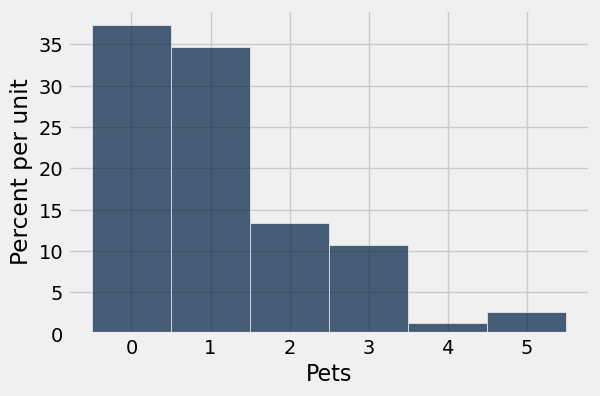

In [8]:
pet_bins = np.arange(-0.5, 6) # Create bins so that 0, 1, 2, ..., 5 are in the center
pets_exercise_w23.hist('Pets', bins=pet_bins)

**Question:** based on the histogram, about what fraction of the class has at least one pet?

(a) 50%

(b) 60%

(c) 70%

(d) 80%

In [ ]:
# 100% - 37% = 63% ~ 60%

We can calculate exactly what fraction of the class has at least one pet. There are several ways to do it!

**Question:** which of the following expressions does *not* calculate the fraction of the class that has at least one pet?

(a) `sum(pets_exercise_w23.column('Pets') >= 1) / 75`

(b) `sum(pets_exercise_w23.column('Pets') > 0)`

(c) `np.count_nonzero(pets_exercise_w23.column('Pets') > 0) / pets_exercise_w23.num_rows`

(d) `np.mean(pets_exercise_w23.column('Pets') >= 1)`

In [10]:
np.mean(pets_exercise_w23.column('Pets') >= 1)

0.62666666666666671

In [ ]:
# Answer (b)
# 

To check for an association between these variables, it's also a good idea to try a scatter plot:

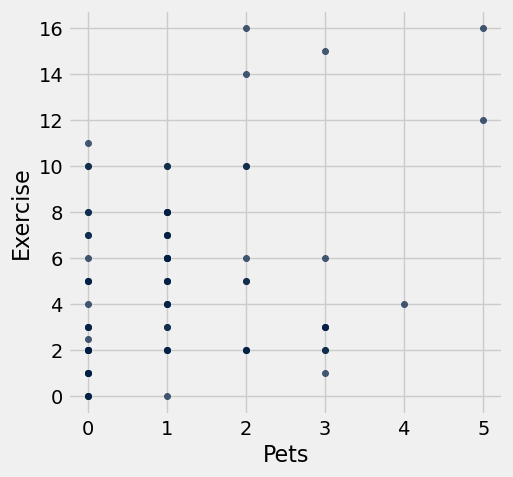

In [11]:
pets_exercise_w23.scatter('Pets', 'Exercise')

Does the plot indicate any kind of association? Maybe---it looks like exercise may weakly trend upward with number of pets. We haven't proven anything yet, but we have found some evidence to motivate further analysis of this data.

For one more visualization, let's create a column called `at_least_one_pet` indicating whether or not each respondent has any pet at all. There are a couple of ways to do this. We could define a function and evaluate it on each row of the table:

In [12]:
def at_least_one(x):
    """
    Returns True if x >= 1; otherwise returns False.
    """
    return x >= 1

In [14]:
at_least_one(0)

False

In [13]:
at_least_one(1)

True

**Question:** if I want an array containing the values `at_least_one(x)` for each number `x` in the Pets column, which table method should I use?

(a) `with_column`

(b) `take`

(c) `apply`

(d) `group`

In [15]:
at_least_one_pet = pets_exercise_w23.apply(at_least_one, 'Pets')
at_least_one_pet

array([ True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False,  True,  True], dtype=bool)

But this calculation is simple enough that we can just work with the `Pets` column directly, as an array:

In [16]:
at_least_one_pet = pets_exercise_w23.column('Pets') >= 1
at_least_one_pet

array([ True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False,  True,  True], dtype=bool)

If we can avoid using the apply method, this is usually better---working with arrays directly is faster for the computer! But however we compute this array, we can add it as a column to our table.

**Question:** what statement should I use to permanently add the `at_least_one_pet` array as a new column to the table?

(a) `pets_exercise_w23.with_column('at_least_one_pet', at_least_one_pet)`

(b) `pets_exercise_w23 = pets_exercise_w23.with_column('at_least_one_pet', at_least_one_pet)`

(c) `pets_exercise_w23.column('at_least_one_pet') = at_least_one_pet`

(d) Trick question: due to the Law of Impermanence, everything that is material is also temporary.

In [ ]:
# Add the at_least_one_pet column to the table
# Answer: (b)

In [20]:
pets_exercise_w23

Pets,Exercise,at_least_one_pet
1,10,True
1,5,True
5,12,True
1,2,True
2,2,True
0,2,False
0,11,False
1,7,True
1,5,True
0,2,False


In [19]:
pets_exercise_w23 = pets_exercise_w23.with_column('at_least_one_pet', at_least_one_pet)

Now let's make one last visualization:

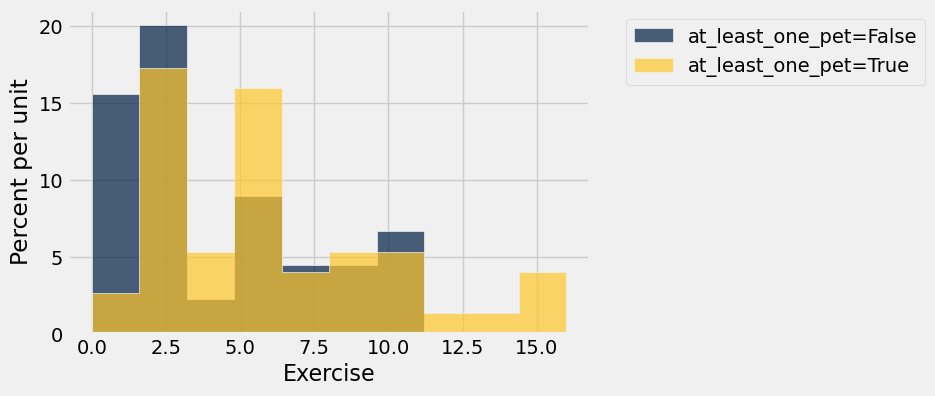

In [21]:
pets_exercise_w23.hist('Exercise', group='at_least_one_pet')

This pair of histograms agrees with our earlier idea: that there may be some positive correlation between pet ownership and amount of exercise. Let's see what the average amount of exercise is for these two groups.

**Question:** I want to calculate the average value of Exercise for the group where `at_least_one_pet` is True and the group where it is False. What table method should I use?

(a) `where`

(b) `group`

(c) `pivot`

(d) `apply`

In [ ]:
# Answer: (b)

In [22]:
group_means = pets_exercise_w23.group('at_least_one_pet', np.mean)
group_means

at_least_one_pet,Pets mean,Exercise mean
False,0,3.98214
True,1.78723,5.97872


On average, survey respondents who have a pet get 2 more hours of exercise per week than those who do not. *This could just be due to random chance.* Maybe, by pure coincidence, highly active pet owners just happened to respond to the survey more often. We can't make any conclusions until we understand how likely it is that this result is due to chance alone.

### Formulating a Hypothesis

Based on what we have seen, we suspect that people who have a pet get more exercise (on average) than people who do not have a pet. To see if our data supports this claim, we need to do a hypothesis test.

In this case, the **null hypothesis** is that there is no difference between the distributions of exercise between the two groups. In other words, if we were able to somehow get exercise and pet ownership data on the entire population, the blue and yellow histograms above would be identical. The null hypothesis is the model in which any discrepancy in exercise amount between the two groups is entirely due to random chance in who responded to the survey.

We have a couple of choices for an alternative hypothesis, depending on what claims we want to assess.

 - Option 1: the two distributions are different. Maybe people who have pets get more exercise, maybe they get less exercise, but regardless of which of these is true, the distributions aren't identical.
 
 - Option 2: the distributions are different, and people who have pets get more exercise on average.
 
 - Option 3: the distributions are different, and people who have pets get less exercise on average.

From our exploratory analysis, we suspect that Option 2 is true, so we will choose this to be our alternative hypothesis:

**Alternative Hypothesis:** people who have pets get more exercise on average.

### Testing the Hypothesis

**Question:** if our null hypothesis is that two samples come from the same distribution, how do we decide if there is enough statistical evidence to disprove this claim?

(a) Plot the histograms for each group and see if they look different

(b) Check if the group means are close together or not

(c) Calculate the TVD between the two samples

(d) A/B Test

In [ ]:
# Answer: (d)

For this test, we will use the difference in means as the test statistic. The value of this statistic is `group_b_mean - group_a_mean`. In this case, Group A are students who do not have pets, and Group B are students who own at least one pet. With this in mind, notice that *larger values of the test statistic support the alternative hypothesis*.

We can use the following function from last class to calculate the difference in group means from a table:

In [23]:
def difference_of_means(table, label, group_label):
    """
    Calculates the difference in means between two groups of rows in a table.
    Takes a table, the name of a column representing a numerical variable,
    and the name of a column indicating which group each row belongs to.
    """
    
    # table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [24]:
# Calculate the observed value of the test statistic
observed_test_stat = difference_of_means(pets_exercise_w23, 'Exercise', 'at_least_one_pet')
observed_test_stat

1.9965805471124622

### Simulating the Null Hypothesis

We will now simulate the values of the test statistic under the null hypothesis.

Simulating the null hypothesis for A/B testing (i.e., that two samples came from the same distribution) is not as straightforward as simulating the null hypotheses for one-sample tests that we have seen. We haven't specified *what* this distribution is: only that it's the same for these two groups. Therefore, we can't just use `sample_proportions` or `np.random.choice`, since we don't know what probabilities to assign to each outcome.

A/B tests get around this problem using a clever trick: we can get new samples of this distribution by *resampling* our data, i.e., creating new samples from our *data* instead of from some probability distribution.

To simulate our dataset under the null hypothesis, we want to draw two samples, one from Group A and one from Group B. The null hypothesis is that these samples should come from the same distribution. Therefore, we can pool all of our data---from both groups---into one larger sample from whatever this distribution is. 

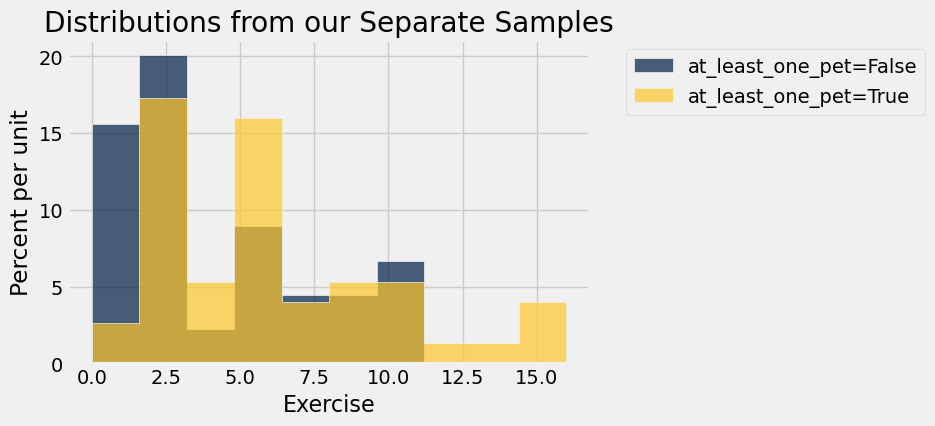

In [25]:
pets_exercise_w23.hist('Exercise', group='at_least_one_pet')
plots.title('Distributions from our Separate Samples');

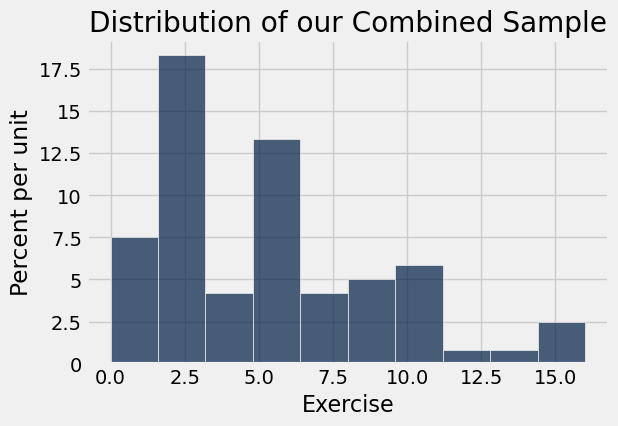

In [26]:
pets_exercise_w23.hist('Exercise')
plots.title('Distribution of our Combined Sample');

If the two groups are from the same distribution, then *the group label doesn't matter*. If you have two coins that you know are fair, it doesn't matter which one you flip: you have the same likelihood of landing on heads. Similarly, if students with pets and students without pets exercise according to the same distribution, group membership doesn't have any impact on how much exercise a student is likely to get.

In order to get the distribution of our test statistic under the null hypothesis, we first need to repeatedly simulate the dataset that we have available---in other words, simulate survey responses for the group with pets and the group without pets. We can do this by randomly selecting our simulated "Group A" responses from the combined distribution (without replacement), and leaving the remaining responses in our simulated "Group B". An equivalent (but easier) way to implement this in code is to randomly shuffle the order of the group labels:

In [27]:
# Randomly shuffle (i.e., re-order) the group labels
# This preserves the original size of each group
shuffled_group_label = pets_exercise_w23.sample(with_replacement=False).column('at_least_one_pet')
shuffled_group_label

array([False, False,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False, False, False,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True], dtype=bool)

In [28]:
# Add the suffled labels to a table with the values of Exercise in their original order
# In effect, we have randomly sampled Group A and Group B from the combined distribution of Exercise
shuffled_table = Table().with_columns(
        'Exercise', pets_exercise_w23.column('Exercise'),
        'Group', shuffled_group_label)
shuffled_table

Exercise,Group
10,False
5,False
12,True
2,True
2,False
2,True
11,True
7,True
5,False
2,False


Then it's easy to compute the simulated value of our test statistic, using the `difference_of_means` function.

In [29]:
difference_of_means(shuffled_table, 'Exercise', 'Group')

0.9422492401215798

As usual, we will repeat this simulation process many times, constructing an array of simulated test statistics using the `np.append` method.

In [30]:
simulated_test_stats = make_array()

for i in range(2000):

    # Shuffle the group labels
    shuffled_group_label = pets_exercise_w23.sample(with_replacement=False).column('at_least_one_pet')

    # Make a table with original exercise values and shuffled group labels
    shuffled_table = Table().with_columns(
        'Exercise', pets_exercise_w23.column('Exercise'),
        'Group', shuffled_group_label)
    
    # Calculate the test statistic
    group_means = shuffled_table.group('Group', np.mean)
    simulated_test_stat = group_means.column(1).item(1) - group_means.column(1).item(0)
    
    simulated_test_stats = np.append(simulated_test_stats, simulated_test_stat)

Finally, we plot a histogram of the distribution of test statistics under the null hypothesis, and we compare it our observed value:

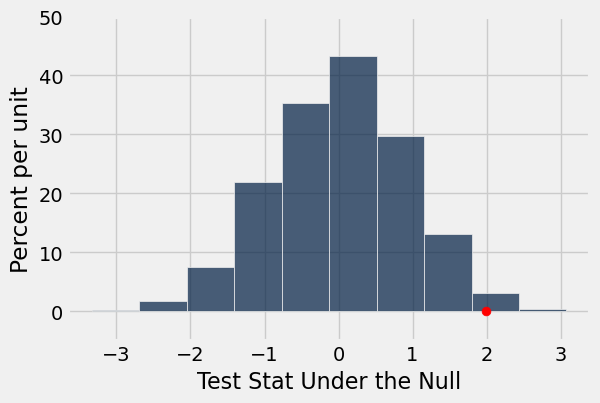

In [31]:
Table().with_column('Test Stat Under the Null', simulated_test_stats).hist()

# Mark the observed value of the test statistic
plots.scatter(observed_test_stat, 0, color='red', s=40)
plots.ylim([-0.05, 0.5]);

**Question:** how can I estimate the $p$-value of this test?

(a) Since positive values of the test statistic support the alternative hypothesis, calculate the fraction of simulated test statistics that are negative.

(b) Since positive values of the test statistic support the alternative hypothesis, calculate the fraction of simulated test statistics that are positive.

(c) Calculate the fraction of simulated test statistics that are *at least* as large as the observed value.

(d) Calculate the fraction of simulated test statistics that are *at most* as large as the observed value.

In [32]:
# Estimate the p-value
# Answer: (c)

In [33]:
np.mean(simulated_test_stats >= observed_test_stat)

0.012500000000000001

**Question:** what is the outcome of this test?

(a) We fail to reject the null hypothesis. 

(b) We reject the null hypothesis (the result is statistically significant).

(c) We reject the null hypothesis (the result is highly statistically significant).

(d) We have proven the null hypothesis to be true.

In [ ]:
# (b)

**Question:** Suppose that our statistics journal only accepts highly statistically significant results. Which of the following is *not* true?

(a) We require the area of the tail to be less than 1% in order to reject the null hypothesis.

(b) At a significance threshold of 0.01, if the null hypothesis is correct, there is still a 1% chance that we will (incorrectly) reject the null hypothesis.

(c) If we have published 100 statistically significant results, it is possible that one or two of them are actually incorrect, even if the hypothesis test was done correctly ([relevant xkcd](https://xkcd.com/882/)).

(d) If $p = 0.01$, there is a 1% chance that the null hypothesis is true.

In [ ]:
# Answer: (d)